In [2]:
pip install pyodbc pandas


     ---------------------------------------- 68.7/68.7 kB 1.3 MB/s eta 0:00:00


In [24]:
pip install -U WordCloud

     -------------------------------------- 300.0/300.0 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install -U scikit-learn

     ---------------------------------------- 10.6/10.6 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 44.1/44.1 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pyodbc
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
server = 'DESKTOP-A6056GC'
database = 'Grocerystore'
trusted_connection = 'yes'  # Menggunakan otentikasi Windows

conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection={trusted_connection}'
conn = pyodbc.connect(conn_str)


In [3]:
query = 'SELECT * FROM GroceryDataset'
data = pd.read_sql(query, conn)

C:\Users\ACER\AppData\Local\Temp\ipykernel_3456\388692688.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


In [4]:
# Menampilkan 5 baris pertama
data.head()

,Sub_Category,Price($),Discount,Reviews,Title,Feature,Product_Description,Rating
0,Bakery & Desserts,6.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...","""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,4.3
1,Bakery & Desserts,59.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",5
2,Bakery & Desserts,4.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,4.1
3,Bakery & Desserts,9.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,4.7
4,Bakery & Desserts,9.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...","""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,4.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sub_Category         1757 non-null   object
 1   Price($)             1757 non-null   object
 2   Discount             1757 non-null   object
 3   Reviews              1757 non-null   object
 4   Title                1757 non-null   object
 5   Feature              1757 non-null   object
 6   Product_Description  1757 non-null   object
 7   Rating               1753 non-null   object
dtypes: object(8)
memory usage: 109.9+ KB


In [6]:
data['Price($)'].unique()

array(['6.99', '59.99', '4.99', '9.99', '2.99', '99.99', '19.99', '7.99',
       '1.99', '0.99', '39.99', '8.99', '1.49', '3.99', '3.79', '3.49',
       '5.99', '6.49', '49.99', '7.49', '1.69', '1.79', '8.49', '7.59',
       '4.49', '0.49', '0.69', '0.19', '2.49', '2.69', '5.49', '6.39',
       '6.69', '5.69', '9.49', '2.09', '0.79', '7.89', '8.79', '0',
       '0.89', '9.89', '8.39', '0.29', '9.69', '0.59', '24.99', '79.99',
       '69.99', '29.99', '1.39', '1.29', '2.39', '5.79', '17.79', '9.79',
       '2.79', '4.79', '14.99', '89.99', '9.97', '0.39', '6.19', '3.69',
       '1.89', '5.29', '9.39', '3.39', '1.59', '5.39', '3.19'],
      dtype=object)

In [7]:
#mengonversi kategori menjadi representasi biner yang sesuai
data_encoded = pd.get_dummies(data, columns=['Sub_Category'])
data_encoded.head()

,Price($),Discount,Reviews,Title,Feature,Product_Description,Rating,Sub_Category_Bakery & Desserts,Sub_Category_Beverages & Water,Sub_Category_Breakfast,...,Sub_Category_Household,Sub_Category_Kirkland Signature Grocery,Sub_Category_Laundry Detergent & Supplies,Sub_Category_Meat & Seafood,Sub_Category_Organic,Sub_Category_Pantry & Dry Goods,Sub_Category_Paper & Plastic Products,Sub_Category_Poultry,Sub_Category_Seafood,Sub_Category_Snacks
0,6.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...","""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,4.3,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,59.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",5,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,4.1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,9.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,4.7,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...","""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,4.5,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Z-Score Standardization
scaler = StandardScaler()
data['Price($)'] = scaler.fit_transform(data[['Price($)']])
data['Price($)'].head()

0   -0.247329
1    2.504027
2   -0.351154
3   -0.091592
4   -0.091592
Name: Price($), dtype: float64

In [9]:
# Exploratory Data Analysis (EDA)

In [10]:
# Statistik Deskriptif
descriptive_stats = data.describe()

In [11]:
# Korelasi antar fitur (hanya untuk fitur numerik)
numeric_columns = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_columns].corr()

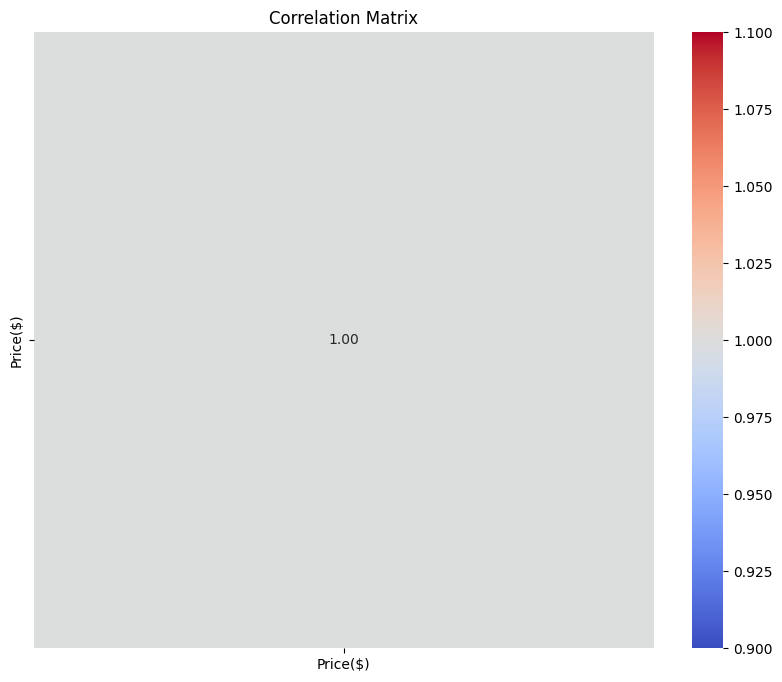

In [32]:
# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

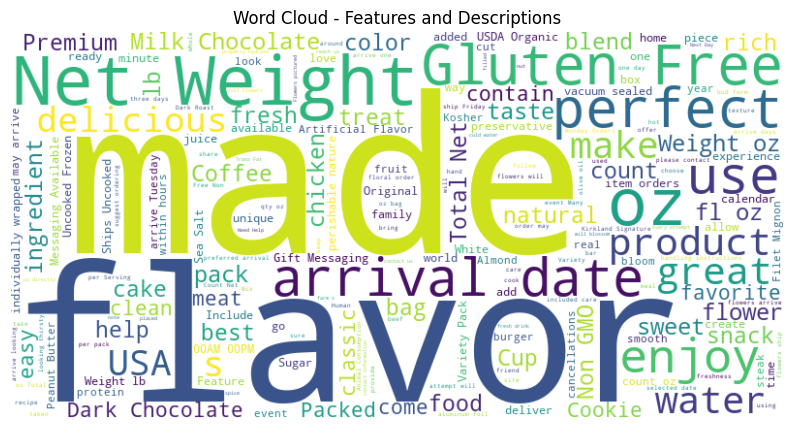

In [28]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Feature'] + ' ' + data['Product_Description']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Features and Descriptions')
plt.show()

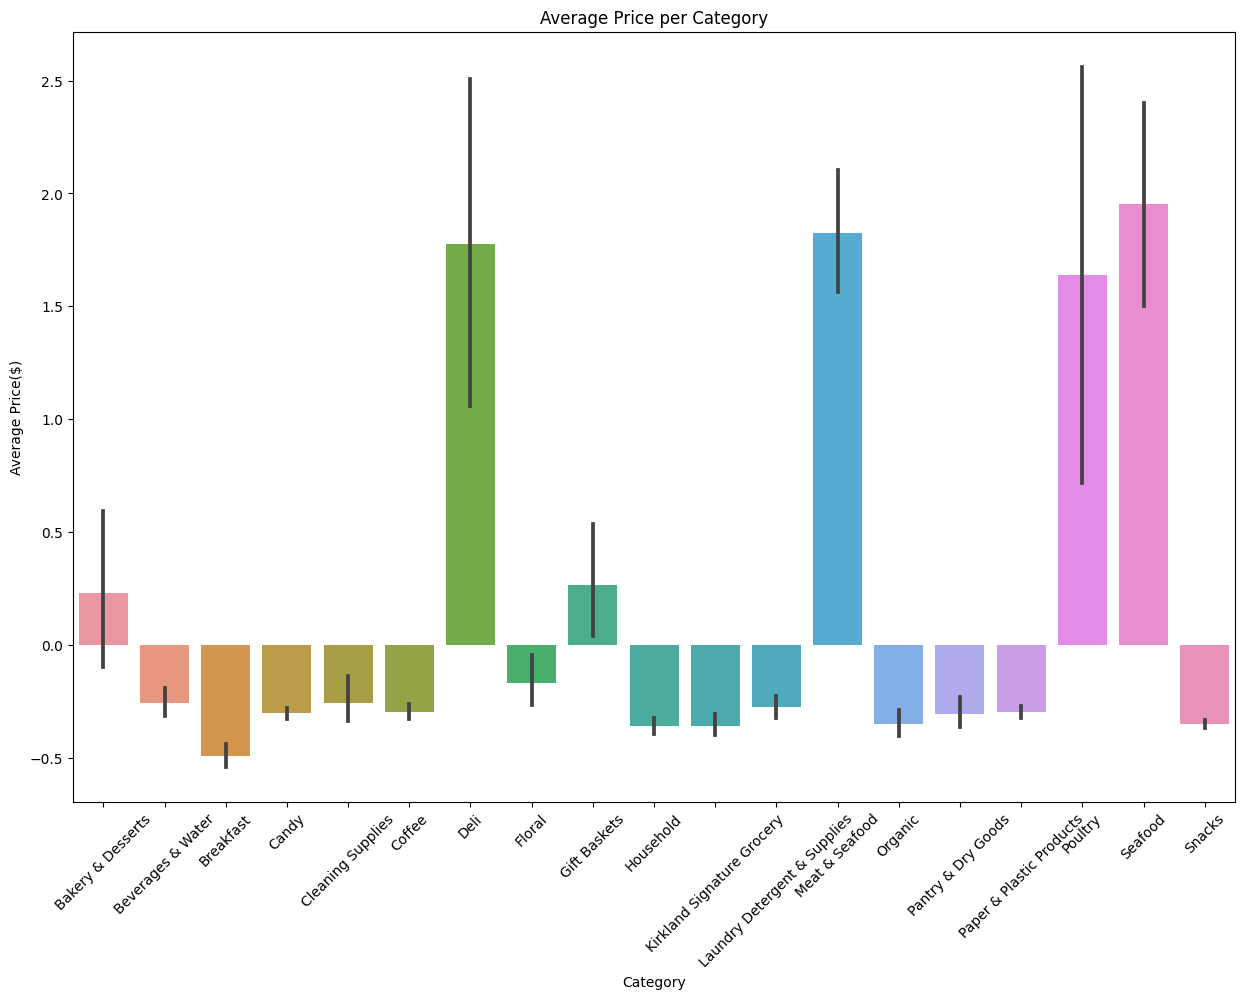

In [39]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Sub_Category', y='Price($)', data=data)
plt.xticks(rotation=45)
plt.title('Average Price per Category')
plt.xlabel('Category')
plt.ylabel('Average Price($)')
plt.show()

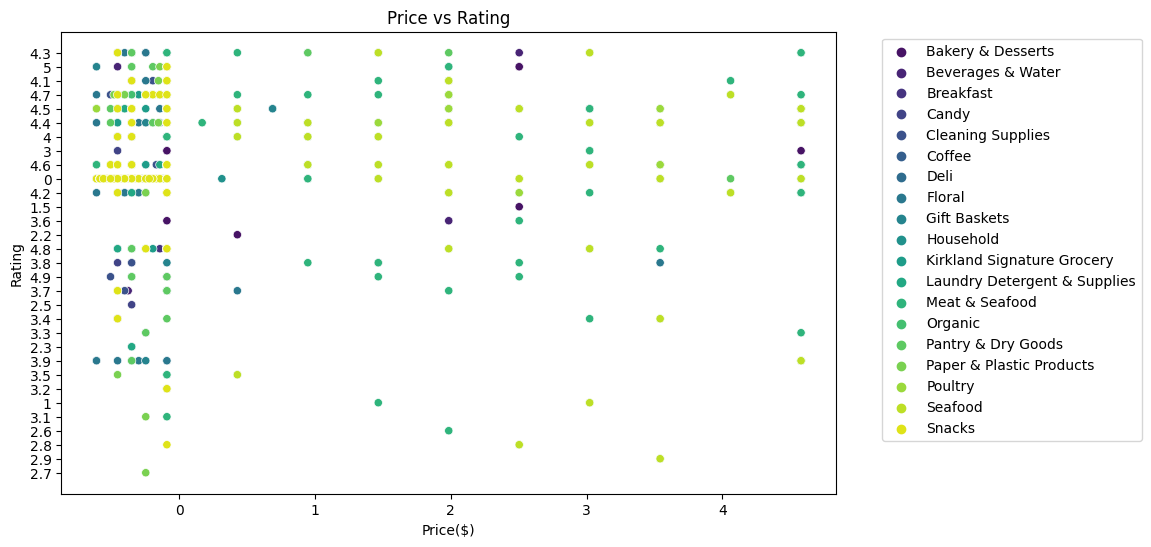

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price($)', y='Rating', data=data, hue='Sub_Category', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Price vs Rating')
plt.xlabel('Price($)')
plt.ylabel('Rating')
plt.show()

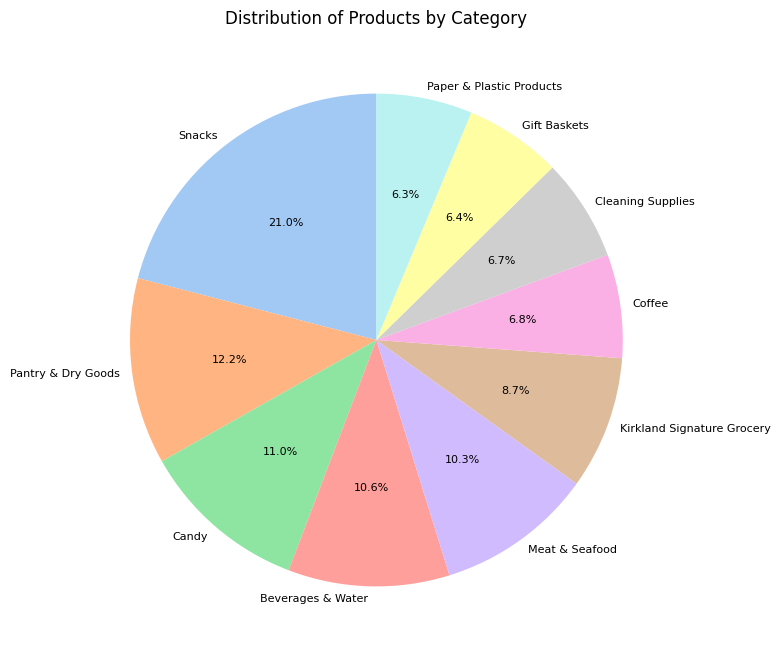

In [68]:
# Hitung jumlah produk dalam setiap kategori
category_counts = data['Sub_Category'].value_counts()

# Ambil 10 teratas
top_10_categories = category_counts.head(10)

# Definisikan palet warna seaborn
colors = sns.color_palette('pastel')[0:len(top_10_categories)]

# Plot pie chart dengan palet warna dan label yang lebih kecil
plt.figure(figsize=(8, 8))
plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%', startangle=90, colors=colors,
        labeldistance=1.05, textprops={'fontsize': 8})
plt.title('Distribution of Products by Category')
plt.show()